In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('HR.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [4]:
df.shape

(14999, 10)

In [5]:
df.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=True)

In [6]:
#pd.set_option('display.max_rows', 14999)

In [6]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11986,0.90,0.55,3,259,10,1,0,1,management,high
11987,0.74,0.95,5,266,10,0,0,1,management,high
11988,0.85,0.54,3,185,10,0,0,1,management,high
11989,0.33,0.65,3,172,10,0,0,1,marketing,high


# number of people employed based on the salary feature

In [8]:
salary = df['salary']
salary

0           low
1        medium
2        medium
3           low
4           low
          ...  
11986      high
11987      high
11988      high
11989      high
11990       low
Name: salary, Length: 11991, dtype: object

In [9]:
salary.isnull().sum()

0

In [10]:
salary.value_counts()

low       5740
medium    5261
high       990
Name: salary, dtype: int64

# number of people employed in every department  

In [11]:
dep = df['department']
dep

0             sales
1             sales
2             sales
3             sales
4             sales
            ...    
11986    management
11987    management
11988    management
11989     marketing
11990            IT
Name: department, Length: 11991, dtype: object

In [12]:
dep.isnull().sum()

0

In [13]:
dep.value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

# تعداد افراد استخدام شده بر اساس سطح حقوق و نوع دپارتمان 

In [14]:
dep_sal=df.loc[:,['salary','department']]
dep_sal

,salary,department
0,low,sales
1,medium,sales
2,medium,sales
3,low,sales
4,low,sales
...,...,...
11986,high,management
11987,high,management
11988,high,management
11989,high,marketing


In [15]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
dep_sal['department_num'] = labelencoder.fit_transform(dep_sal['department'])

In [16]:
#dep_sal = dep_sal.drop("department_num", axis=1)

In [17]:
q = dep_sal.groupby(['salary' , 'department']).agg('count')
q

department_num
salary department                 
high   IT                       71
       RandD                    47
       accounting               63
       hr                       38
       management              128
       marketing                62
       product_mng              52
       sales                   237
       support                 126
       technical               166
low    IT                      476
       RandD                   322
       accounting              296
       hr                      296
       management              139
       marketing               310
       product_mng             343
       sales                  1553
       support                 867
       technical              1138
medium IT                      429
       RandD                   325
       accounting              262
       hr                      267
       management              169
       marketing               301
       product_mng             291
       sales                  1449
       support                 828
       technical               940

In [18]:
table = pd.pivot_table(dep_sal, index =['salary','department']) 
table

department_num
salary department                 
high   IT                        0
       RandD                     1
       accounting                2
       hr                        3
       management                4
       marketing                 5
       product_mng               6
       sales                     7
       support                   8
       technical                 9
low    IT                        0
       RandD                     1
       accounting                2
       hr                        3
       management                4
       marketing                 5
       product_mng               6
       sales                     7
       support                   8
       technical                 9
medium IT                        0
       RandD                     1
       accounting                2
       hr                        3
       management                4
       marketing                 5
       product_mng               6
       sales                     7
       support                   8
       technical                 9

# بیشترین تعداد پروژه ای که پرسنل دچار ریزش داشته اند بر اساس سطح رضایتمندی

In [19]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [20]:
proj=df.loc[:,['satisfaction_level','number_project','left']]
proj=proj[proj['left']==1]
proj

,satisfaction_level,number_project,left
0,0.38,2,1
1,0.80,5,1
2,0.11,7,1
3,0.72,5,1
4,0.37,2,1
...,...,...,...
1986,0.37,2,1
1987,0.11,7,1
1988,0.41,2,1
1989,0.84,4,1


In [21]:
proj = proj.drop("left", axis=1)

In [22]:
table1 = pd.pivot_table(proj, index =['satisfaction_level']) 
table1

,number_project
satisfaction_level,
0.09,6.209091
0.10,6.206897
0.11,6.170213
0.12,4.000000
0.13,6.000000
...,...
0.88,4.470588
0.89,4.500000
0.90,4.692308


In [23]:
a = proj.groupby(['satisfaction_level']).agg({'number_project' : np.max})
a

,number_project
satisfaction_level,
0.09,7
0.10,7
0.11,7
0.12,5
0.13,6
...,...
0.88,5
0.89,5
0.90,5


In [24]:
top_5 = a.nlargest(5,'number_project')
top_5

,number_project
satisfaction_level,
0.09,7
0.10,7
0.11,7
0.14,7
0.15,7


In [25]:
a.sort_values(by=['number_project'], axis=0, ascending=False, inplace=False, ignore_index=False)

,number_project
satisfaction_level,
0.09,7
0.21,7
0.10,7
0.51,7
0.24,7
...,...
0.37,2
0.65,2
0.29,2


# اخرین وضعیت ارزیابی پرسنلی که در شرکت دچار ریزش نشدند بصورت نزولی

In [26]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [27]:
evaluat=df.loc[:,['last_evaluation','left']]
evaluat=evaluat[evaluat['left']==0]
evaluat

,last_evaluation,left
1991,0.74,0
1992,0.67,0
1993,0.69,0
1994,0.82,0
1995,0.60,0
...,...,...
11986,0.55,0
11987,0.95,0
11988,0.54,0
11989,0.65,0


In [28]:
evaluat = evaluat.drop("left", axis=1)

In [29]:
evaluat.sort_values(by=['last_evaluation'], axis=0, ascending=False, inplace=False, ignore_index=False)

,last_evaluation
4113,1.00
3885,1.00
5710,1.00
6800,1.00
2087,1.00
...,...
3492,0.36
4049,0.36
6535,0.36
6728,0.36


# تاثیرگذارترین مولفه بر روی تارگت مسئله بر اساس تشخیص همبستگی   

In [30]:
df_c=df
df_c

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11986,0.90,0.55,3,259,10,1,0,1,management,high
11987,0.74,0.95,5,266,10,0,0,1,management,high
11988,0.85,0.54,3,185,10,0,0,1,management,high
11989,0.33,0.65,3,172,10,0,0,1,marketing,high


In [31]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_c['department_num'] = labelencoder.fit_transform(df['department'])
df_c['salary_num'] = labelencoder.fit_transform(df['salary'])
#salary_num and department_num are ordinaly features, so we need spearman corr

In [32]:
df_c

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,department_num,salary_num
0,0.38,0.53,2,157,3,0,1,0,sales,low,7,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,7,2
2,0.11,0.88,7,272,4,0,1,0,sales,medium,7,2
3,0.72,0.87,5,223,5,0,1,0,sales,low,7,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...
11986,0.90,0.55,3,259,10,1,0,1,management,high,4,0
11987,0.74,0.95,5,266,10,0,0,1,management,high,4,0
11988,0.85,0.54,3,185,10,0,0,1,management,high,4,0
11989,0.33,0.65,3,172,10,0,0,1,marketing,high,5,0


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = df_c.corr(method='spearman')
corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department_num,salary_num
satisfaction_level,1.000000,0.139972,-0.000679,0.061647,-0.162049,0.036668,-0.318436,0.016499,0.007844,0.010037
last_evaluation,0.139972,1.000000,0.267199,0.265949,0.110306,-0.004792,0.005765,-0.006012,0.009110,0.004769
number_project,-0.000679,0.267199,1.000000,0.310578,0.214167,-0.000930,-0.008000,0.001616,0.017824,0.002427
average_montly_hours,0.061647,0.265949,0.310578,1.000000,0.122229,-0.009513,0.047631,-0.004631,0.003531,0.001956
time_spend_company,-0.162049,0.110306,0.214167,0.122229,1.000000,-0.019088,0.259352,0.027375,-0.015055,0.009205
Work_accident,0.036668,-0.004792,-0.000930,-0.009513,-0.019088,1.000000,-0.125436,0.029852,0.004997,-0.003546
left,-0.318436,0.005765,-0.008000,0.047631,0.259352,-0.125436,1.000000,-0.044657,0.018134,-0.013233
promotion_last_5years,0.016499,-0.006012,0.001616,-0.004631,0.027375,0.029852,-0.044657,1.000000,-0.034690,0.017480
department_num,0.007844,0.009110,0.017824,0.003531,-0.015055,0.004997,0.018134,-0.034690,1.000000,0.003792
salary_num,0.010037,0.004769,0.002427,0.001956,0.009205,-0.003546,-0.013233,0.017480,0.003792,1.000000


<AxesSubplot:>

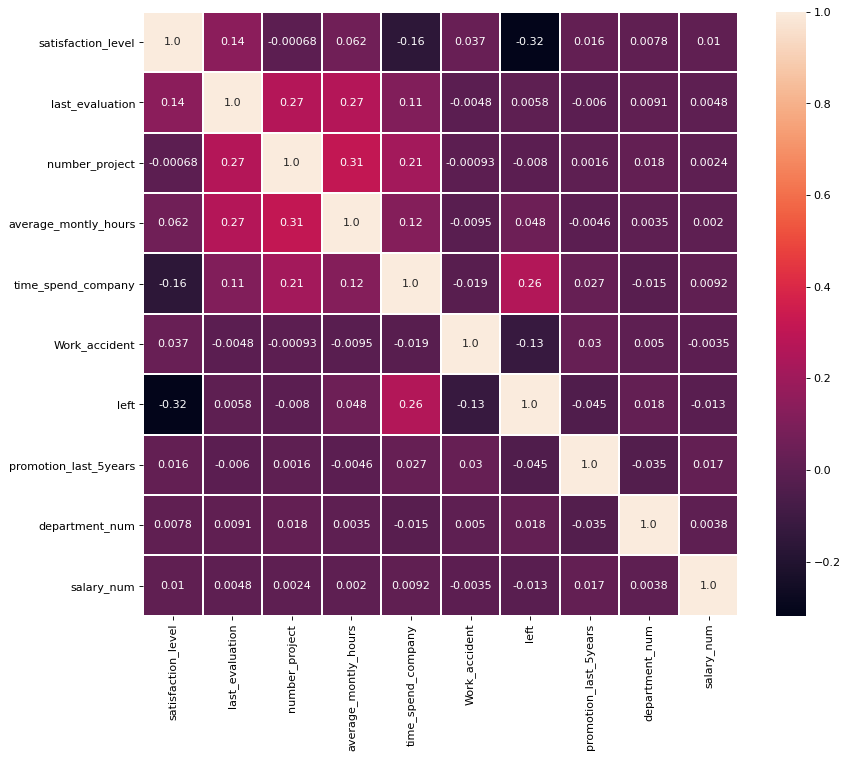

In [34]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(corr, annot=True , fmt=".2" ,linewidths=.9)
# we can see the most effective feature is the satisfaction_level which is in the opposite direction

#   تحلیل نمودار ازدحامی ریزش پرسنل بر اساس نوع دپارتمان و میانگین زمان حضور در سازمان

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11991 entries, 0 to 11990
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  object 
 9   salary                 11991 non-null  object 
 10  department_num         11991 non-null  int32  
 11  salary_num             11991 non-null  int32  
dtypes: float64(2), int32(2), int64(6), object(2)
memory usage: 1.0+ MB


In [36]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary', 'department_num',
       'salary_num'],
      dtype='object')

C:\Users\kaveh karimadini\.conda\envs\100days\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 27.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\kaveh karimadini\.conda\envs\100days\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='department_num', ylabel='average_montly_hours'>

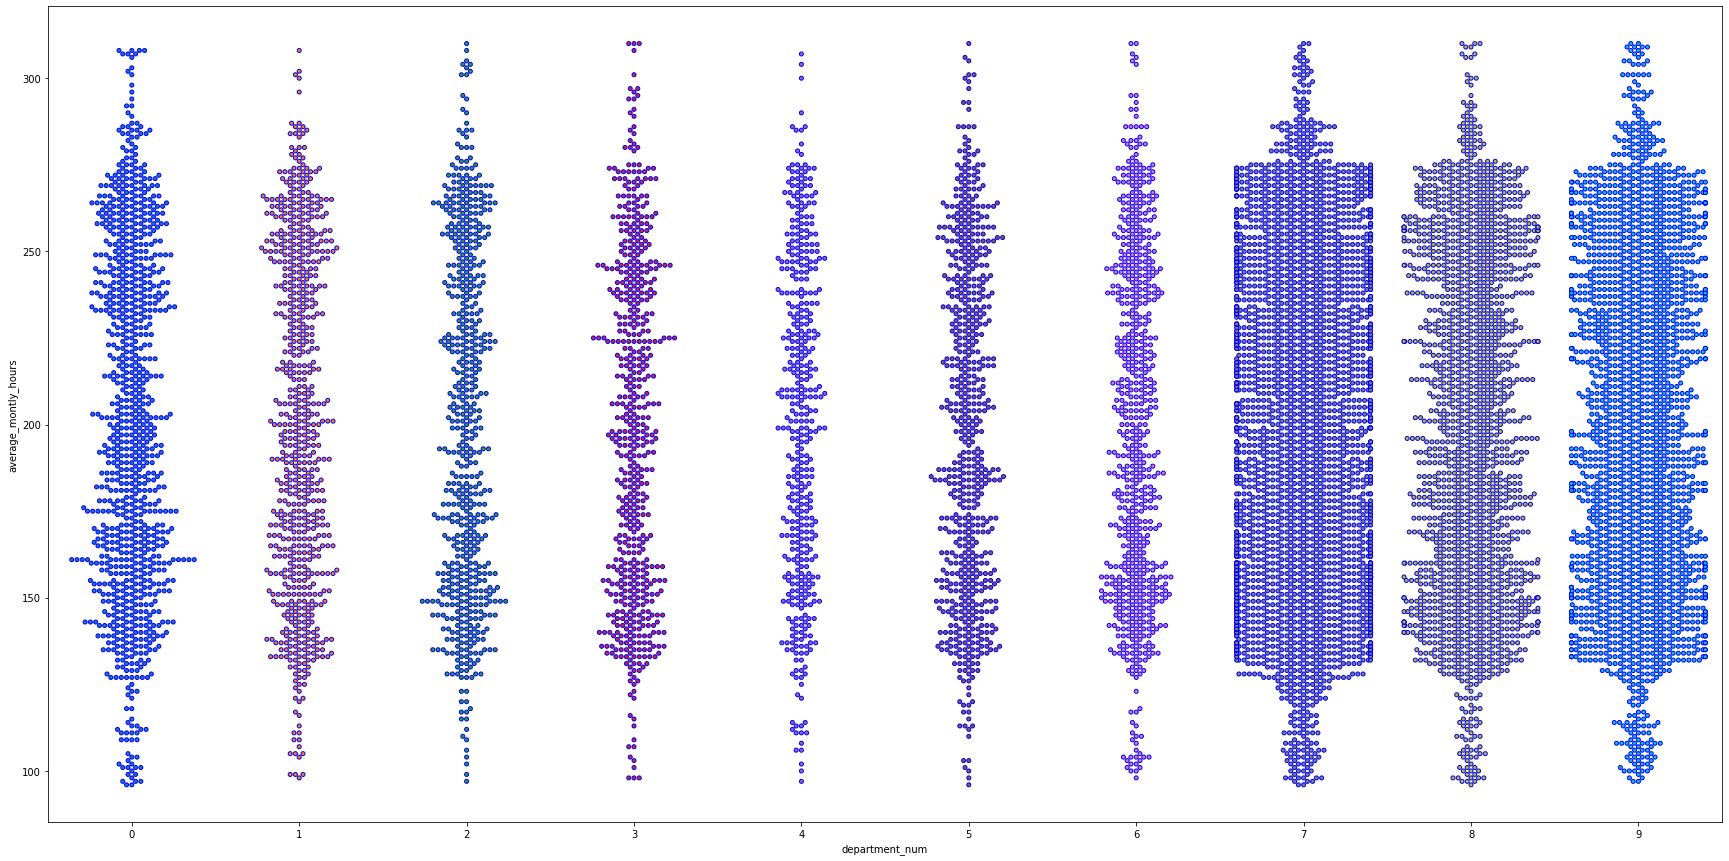

In [37]:
plt.figure(figsize=(30,15),facecolor =  "w" )
sns.swarmplot(x=df_c['department_num'], y=df['average_montly_hours'],  size = 4, linewidth=1., edgecolor='blue')
#as you can see department of sale,support and technical have the most frequency

# نمودار جعبه ای تمامی دپارتمان ها بر حسب ریزش پرسنل و میانگین زمان حضور در سازمان در یک قاب

In [38]:
sn = df_c.drop(["department","salary"], axis=1)

In [39]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

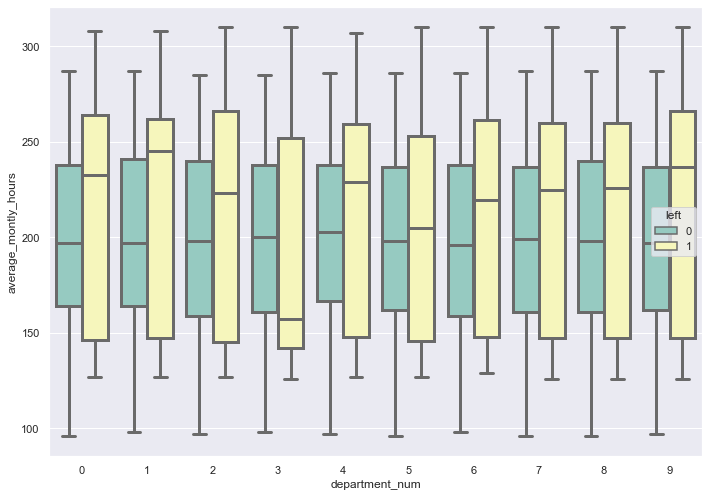

In [40]:
ax = sns.boxplot(x="department_num", y="average_montly_hours", hue="left", data=sn, palette="Set3",linewidth=3)

# مقایسه توزیع و نمودار جعبه ای پرسنل وفادار سازمان بر اساس اخرین و ضعیت ارزیابی افراد سازمان در یک قاب

C:\Users\kaveh karimadini\.conda\envs\100days\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 28.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='left', ylabel='last_evaluation'>

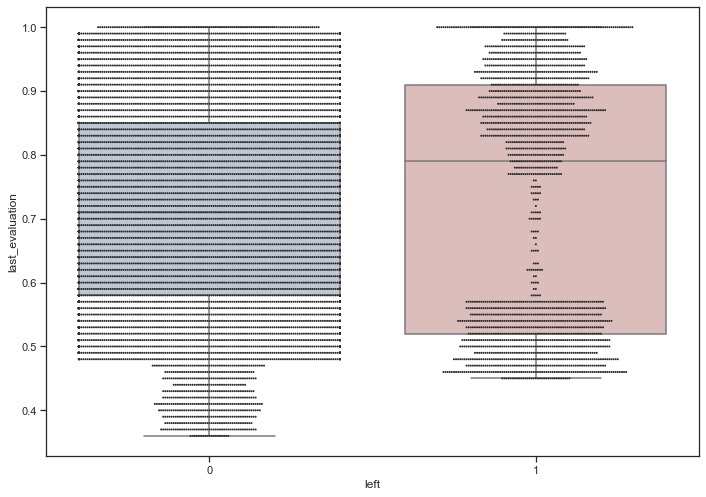

In [41]:
sns.set(style="ticks")

# Plot the orbital period with horizontal boxes
sns.boxplot(x="left", y="last_evaluation", data=df
            , palette="vlag")

# Add in points to show each observation
sns.swarmplot(x="left", y="last_evaluation", data=df,
              size=1, color=".3", linewidth=1)

# مقایسه هیستوگرام اخرین وضعیت ارزیابی پرسنلی که دچار ریزش و پرسنلی که در شرکت فعال خواهند بود در یک قالب

<AxesSubplot:xlabel='last_evaluation', ylabel='Count'>

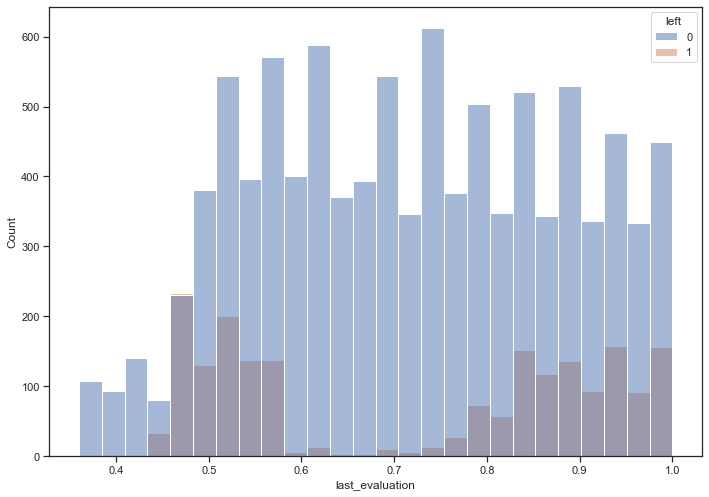

In [42]:
sns.histplot(data=df, x="last_evaluation", hue="left")

# مقایسه هیستوگرام رضایتمندی پرسنلی که دچار ریزش و پرسنلی که در شرکت فعال خواهند بود در یک قالب

<AxesSubplot:xlabel='satisfaction_level', ylabel='Count'>

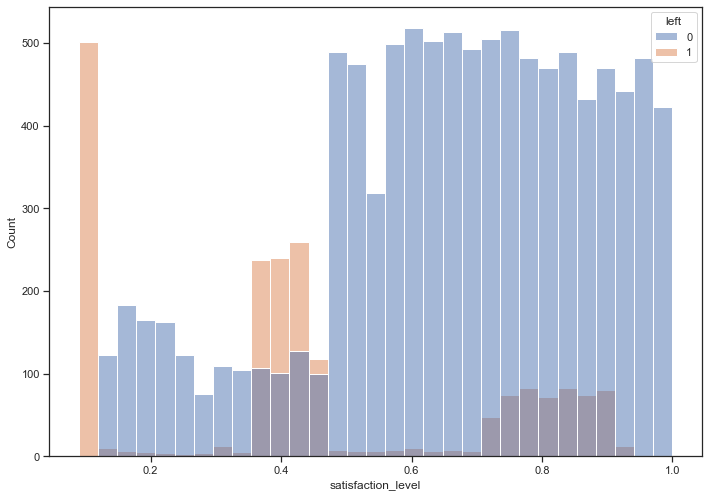

In [43]:
sns.histplot(data=df, x="satisfaction_level", hue="left")

# ترسیم نمودار تعداد افراد مشغول درهر دپارتمان دیتاست برحسب میزان درآمد

In [44]:
#sns.set(rc={'figure.figsize':(11.7,8.27)})

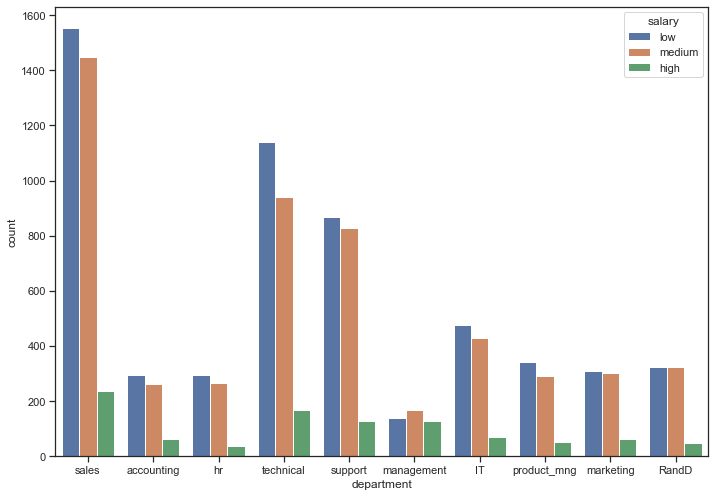

In [45]:
ax_1 = sns.countplot(x="department", hue="salary", data=df)